# V7

In [1]:
import librosa
import librosa.display

from IPython.display import Audio # to play the audio files
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import noisereduce as nr
import random
import wave

# for colors and to make the plots a little bit nicer
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
df_development = pd.read_csv('/Users/rostislavtimuta/Desktop/dsl_data/development.csv')
df_development['labels'] = df_development.apply(lambda row: row['action'] + row['object'], axis=1)

# Instantiate the encoder
encoder = LabelEncoder()
# Fit and transform the labels
encoded_labels = encoder.fit_transform(df_development['labels'])
df_development["encoded_labels"]= encoded_labels

In [3]:
df_development.drop(columns=["speakerId","First Language spoken", "Current language used for work/school" ])

,Id,path,action,object,Self-reported fluency level,gender,ageRange,labels,encoded_labels
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,change language,none,advanced,female,22-40,change languagenone,1
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,activate,music,advanced,female,22-40,activatemusic,0
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,deactivate,lights,advanced,female,22-40,deactivatelights,2
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,increase,volume,advanced,female,22-40,increasevolume,6
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,increase,volume,advanced,female,22-40,increasevolume,6
...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,decrease,volume,native,male,22-40,decreasevolume,4
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,deactivate,lights,native,male,22-40,deactivatelights,2
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,deactivate,lights,native,male,22-40,deactivatelights,2
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,deactivate,lights,native,male,22-40,deactivatelights,2


In [4]:
def wav_length(filename):
    return librosa.get_duration(filename=filename)
df_development["duration"] = df_development["path"].apply(wav_length)

In [5]:
df_development

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange,labels,encoded_labels,duration
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,change languagenone,1,1.857625
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40,activatemusic,0,1.393188
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40,deactivatelights,2,1.950500
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,increasevolume,6,1.764687
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,increasevolume,6,2.414875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,vnljypgejkINbBAY,decrease,volume,native,English (United States),English (United States),male,22-40,decreasevolume,4,2.730688
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,deactivatelights,2,2.645313
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,deactivatelights,2,2.645313
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,deactivatelights,2,2.304000


In [6]:
def perform_statistics_on_durations(durations):
    # Calculate mean
    mean = durations.mean()
    # Calculate standard deviation
    std = durations.std()
    # Calculate minimum
    min_val = durations.min()
    # Calculate maximum
    max_val = durations.max()

    # Print results
    print("Mean: ", mean)
    print("Standard Deviation: ", std)
    print("Minimum: ", min_val)
    print("Maximum: ", max_val)
    


In [7]:
perform_statistics_on_durations(df_development["duration"])

Mean:  2.639782486807341
Standard Deviation:  3.133638570344316
Minimum:  0.6501875
Maximum:  20.0


In [8]:
# check whether the dataset is balanced or not
def check_class_balance(labels):
    label_counts = Counter(labels)
    # Plot the results as a bar chart
    plt.bar(label_counts.keys(), label_counts.values())
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    plt.show()
    label_counts
    print(label_counts)

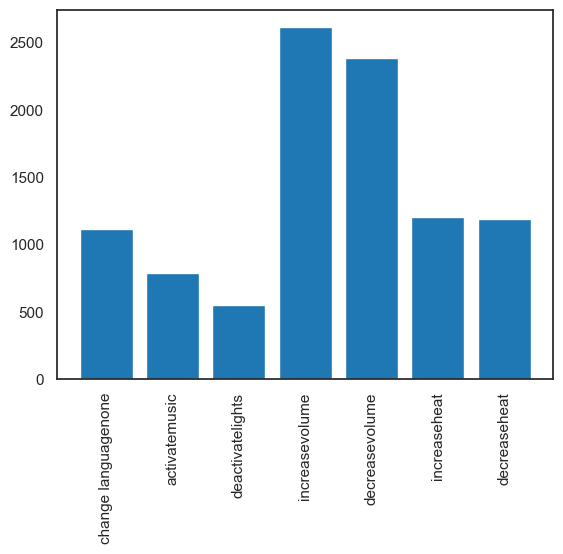

Counter({'increasevolume': 2614, 'decreasevolume': 2386, 'increaseheat': 1209, 'decreaseheat': 1189, 'change languagenone': 1113, 'activatemusic': 791, 'deactivatelights': 552})


In [9]:
check_class_balance(df_development["labels"])

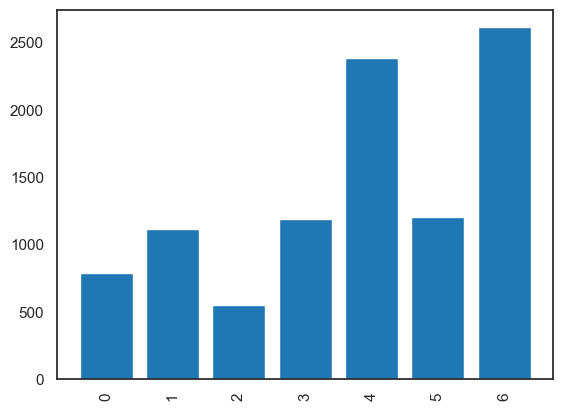

Counter({6: 2614, 4: 2386, 5: 1209, 3: 1189, 1: 1113, 0: 791, 2: 552})


In [10]:
check_class_balance(df_development["encoded_labels"])

In [11]:
def extract_raw_data(paths):
    signals = []
    for path in paths:
        signal, _ = librosa.load(path)
        signals.append(signal)
    return signals

def remove_noise(signals):
    free_noise_signals = []
    for signal in signals:
        free_noise_signal = nr.reduce_noise(signal, sr=22050)
        free_noise_signals.append(free_noise_signal)
    return free_noise_signals

def remove_silence(signals):
    trimmed_signals = []
    for signal in signals:
        trimmed_signal, _ = librosa.effects.trim(signal, top_db=20)
        trimmed_signals.append(trimmed_signal)
    return trimmed_signals

def calculate_durations(signals):
    durations = []
    for signal in signals:
        duration = librosa.get_duration(y=signal, sr=22050)
        durations.append(duration)
    return durations

In [12]:
#raw_signals_0 = extract_raw_data(df_development[df_development['encoded_labels'] == 0]['path'].tolist())
#raw_signals_1 = extract_raw_data(df_development[df_development['encoded_labels'] == 1]['path'].tolist())
#raw_signals_2 = extract_raw_data(df_development[df_development['encoded_labels'] == 2]['path'].tolist())
#raw_signals_3 = extract_raw_data(df_development[df_development['encoded_labels'] == 3]['path'].tolist())
#raw_signals_4 = extract_raw_data(df_development[df_development['encoded_labels'] == 4]['path'].tolist())
#raw_signals_5 = extract_raw_data(df_development[df_development['encoded_labels'] == 5]['path'].tolist())
#raw_signals_6 = extract_raw_data(df_development[df_development['encoded_labels'] == 6]['path'].tolist())

In [17]:
def load_signal(row):
    path = row['path']
    y, sr = librosa.load(path)
    return y

df_development['signal'] = df_development.apply(load_signal, axis=1)

In [18]:
df_development

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange,labels,encoded_labels,duration,signal
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,change languagenone,1,1.857625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40,activatemusic,0,1.393188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40,deactivatelights,2,1.950500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,increasevolume,6,1.764687,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,increasevolume,6,2.414875,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,vnljypgejkINbBAY,decrease,volume,native,English (United States),English (United States),male,22-40,decreasevolume,4,2.730688,"[0.009223618, 0.010777138, 0.009321626, 0.0099..."
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,deactivatelights,2,2.645313,"[0.00936052, 0.010867924, 0.009305291, 0.00991..."
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,deactivatelights,2,2.645313,"[0.0014334349, 0.001723074, 0.0015384919, 0.00..."
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40,deactivatelights,2,2.304000,"[0.009742705, 0.011407773, 0.009794228, 0.0103..."


In [19]:
df_development = df_development.drop(columns=["speakerId","First Language spoken", "Current language used for work/school" ])

In [20]:
df_development

,Id,path,action,object,Self-reported fluency level,gender,ageRange,labels,encoded_labels,duration,signal
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,change language,none,advanced,female,22-40,change languagenone,1,1.857625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,activate,music,advanced,female,22-40,activatemusic,0,1.393188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,deactivate,lights,advanced,female,22-40,deactivatelights,2,1.950500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,increase,volume,advanced,female,22-40,increasevolume,6,1.764687,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,increase,volume,advanced,female,22-40,increasevolume,6,2.414875,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,decrease,volume,native,male,22-40,decreasevolume,4,2.730688,"[0.009223618, 0.010777138, 0.009321626, 0.0099..."
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,deactivate,lights,native,male,22-40,deactivatelights,2,2.645313,"[0.00936052, 0.010867924, 0.009305291, 0.00991..."
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,deactivate,lights,native,male,22-40,deactivatelights,2,2.645313,"[0.0014334349, 0.001723074, 0.0015384919, 0.00..."
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,deactivate,lights,native,male,22-40,deactivatelights,2,2.304000,"[0.009742705, 0.011407773, 0.009794228, 0.0103..."


In [21]:
sample_widths = []
for path in df_development["path"]:
    with wave.open(path, "rb") as audio_file:
        sample_width = audio_file.getsampwidth()
        sample_widths.append(sample_width)
sample_widths = np.asanyarray(sample_widths)
np.unique(sample_widths)

array([2])

Text(0, 0.5, 'Count')

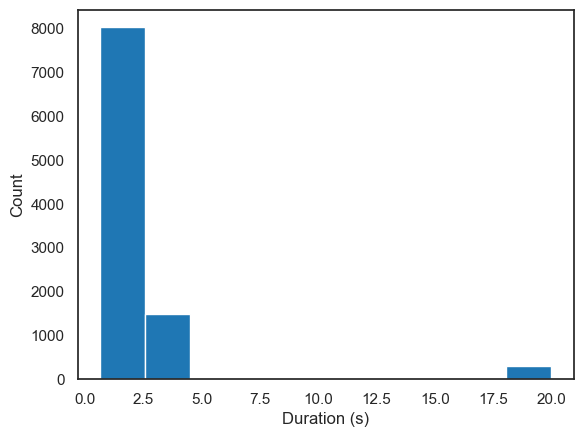

In [22]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

df_development['duration'].plot(kind='hist', x='Duration', y='Count')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
#plt.savefig('duration_histogram.svg')

In [23]:
example_data, example_sample_rate = librosa.load(df_development["path"][7353]) # with librosa
example_data

array([ 0.        ,  0.        ,  0.        , ..., -0.00885078,
       -0.00183501,  0.        ], dtype=float32)

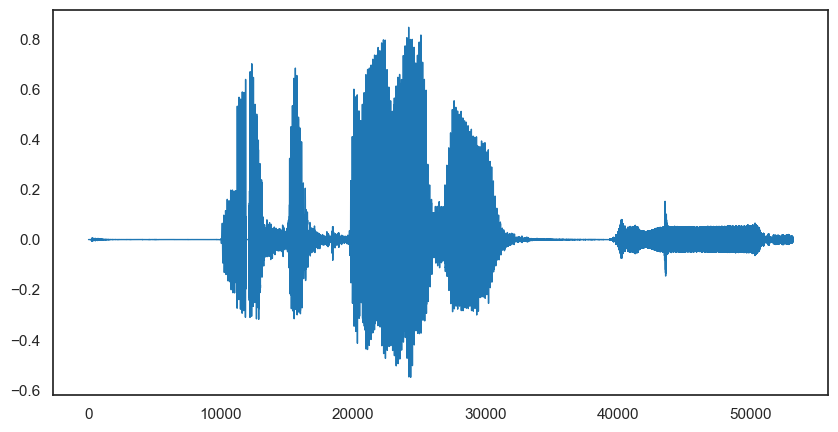

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib
pd.Series(example_data).plot(figsize=(10,5),
                    lw=1,
                    color=color_pal[0])
plt.show()
plt.savefig('raw_signal.svg')

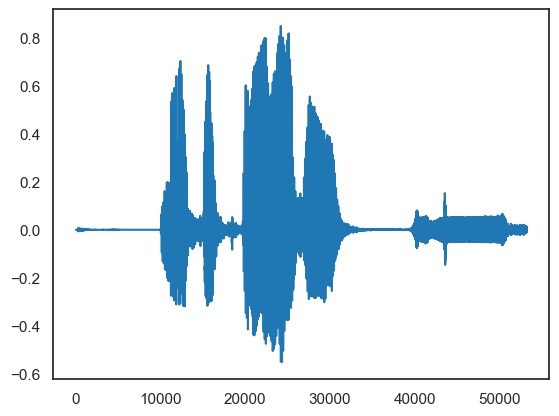

In [25]:
file = df_development["path"][7353]
signal, _ = librosa.load(file)
plt.plot(signal)
plt.savefig('raw_signal.svg', format ='svg')
plt.show()


In [26]:
def trim_signal_and_reduce_noise(row):
    signal = row["signal"]
    free_noise_signal = nr.reduce_noise(signal, sr=22050)
    trimmed_signal,_ = librosa.effects.trim(free_noise_signal, top_db=20)
    return trimmed_signal

df_development['trimmed_signal'] = df_development.apply(trim_signal_and_reduce_noise, axis=1)

In [27]:
Audio(df_development["trimmed_signal"][7353], rate=22050)

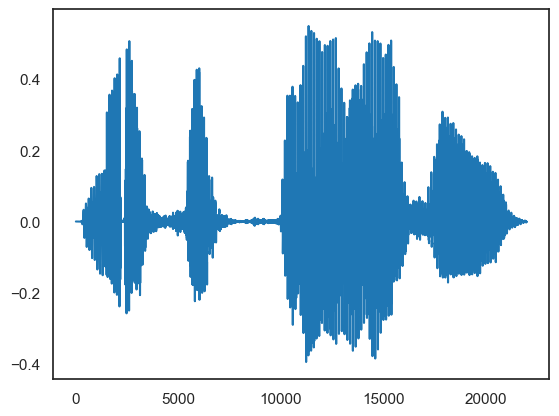

In [28]:
plt.plot(df_development["trimmed_signal"][7353])
plt.savefig('trimmed_raw_signal.svg', format ='svg')
plt.show()


In [29]:
df_development

,Id,path,action,object,Self-reported fluency level,gender,ageRange,labels,encoded_labels,duration,signal,trimmed_signal
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,change language,none,advanced,female,22-40,change languagenone,1,1.857625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00038386122, -2.9631736e-05, 0.00043674716..."
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,activate,music,advanced,female,22-40,activatemusic,0,1.393188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0001973092, 0.00019841935, 0.00020193924, 0..."
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,deactivate,lights,advanced,female,22-40,deactivatelights,2,1.950500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00046959304, -0.0004228406, -0.00037866205..."
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,increase,volume,advanced,female,22-40,increasevolume,6,1.764687,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0023843187, 0.0011422603, 0.00060457544, -0..."
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,increase,volume,advanced,female,22-40,increasevolume,6,2.414875,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.8650666e-06, 4.5902016e-07, 2.5854797e-06, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,decrease,volume,native,male,22-40,decreasevolume,4,2.730688,"[0.009223618, 0.010777138, 0.009321626, 0.0099...","[0.0011400677, 0.00062368234, 0.0006676242, 0...."
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,deactivate,lights,native,male,22-40,deactivatelights,2,2.645313,"[0.00936052, 0.010867924, 0.009305291, 0.00991...","[0.00022672562, 0.009770029, 0.0006682099, -0...."
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,deactivate,lights,native,male,22-40,deactivatelights,2,2.645313,"[0.0014334349, 0.001723074, 0.0015384919, 0.00...","[0.0002538095, -0.0005805413, -0.0006406633, -..."
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,deactivate,lights,native,male,22-40,deactivatelights,2,2.304000,"[0.009742705, 0.011407773, 0.009794228, 0.0103...","[0.0009105488, 0.000984294, 0.0010429965, 0.00..."


In [30]:
def get_trimmed_audio_duration(row):
    trimmed_signal = row["trimmed_signal"]
    return librosa.get_duration(y=trimmed_signal, sr = 22050)
df_development["duration_trimmed"] = df_development.apply(get_trimmed_audio_duration, axis=1)

In [31]:
df_development

,Id,path,action,object,Self-reported fluency level,gender,ageRange,labels,encoded_labels,duration,signal,trimmed_signal,duration_trimmed
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,change language,none,advanced,female,22-40,change languagenone,1,1.857625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00038386122, -2.9631736e-05, 0.00043674716...",1.184218
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,activate,music,advanced,female,22-40,activatemusic,0,1.393188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0001973092, 0.00019841935, 0.00020193924, 0...",0.603719
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,deactivate,lights,advanced,female,22-40,deactivatelights,2,1.950500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00046959304, -0.0004228406, -0.00037866205...",1.230658
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,increase,volume,advanced,female,22-40,increasevolume,6,1.764687,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0023843187, 0.0011422603, 0.00060457544, -0...",0.859138
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,increase,volume,advanced,female,22-40,increasevolume,6,2.414875,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.8650666e-06, 4.5902016e-07, 2.5854797e-06, ...",1.393197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,decrease,volume,native,male,22-40,decreasevolume,4,2.730688,"[0.009223618, 0.010777138, 0.009321626, 0.0099...","[0.0011400677, 0.00062368234, 0.0006676242, 0....",0.952018
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,deactivate,lights,native,male,22-40,deactivatelights,2,2.645313,"[0.00936052, 0.010867924, 0.009305291, 0.00991...","[0.00022672562, 0.009770029, 0.0006682099, -0....",1.160998
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,deactivate,lights,native,male,22-40,deactivatelights,2,2.645313,"[0.0014334349, 0.001723074, 0.0015384919, 0.00...","[0.0002538095, -0.0005805413, -0.0006406633, -...",1.114558
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,deactivate,lights,native,male,22-40,deactivatelights,2,2.304000,"[0.009742705, 0.011407773, 0.009794228, 0.0103...","[0.0009105488, 0.000984294, 0.0010429965, 0.00...",0.603719


In [32]:
perform_statistics_on_durations(df_development["duration_trimmed"])

Mean:  1.0093932456955528
Standard Deviation:  0.4483155819339773
Minimum:  0.11609977324263039
Maximum:  10.332879818594105


#### MFCCs extraction

In [33]:
def extract_comprehensive_mfccs(row):
    signal = row["trimmed_signal"]
    signal = signal[-40000:]
    signal = np.pad(signal, (0, 40000-len(signal)), 'constant')
    
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=5, sr=22050)
    # Calculate delta and delta2 MFCCs
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    
    return comprehensive_mfccs.reshape(-1)


df_development["features"] = df_development.apply(extract_comprehensive_mfccs, axis=1)

In [34]:
features = np.vstack(df_development['features'].to_numpy())
features.shape

(9854, 1185)

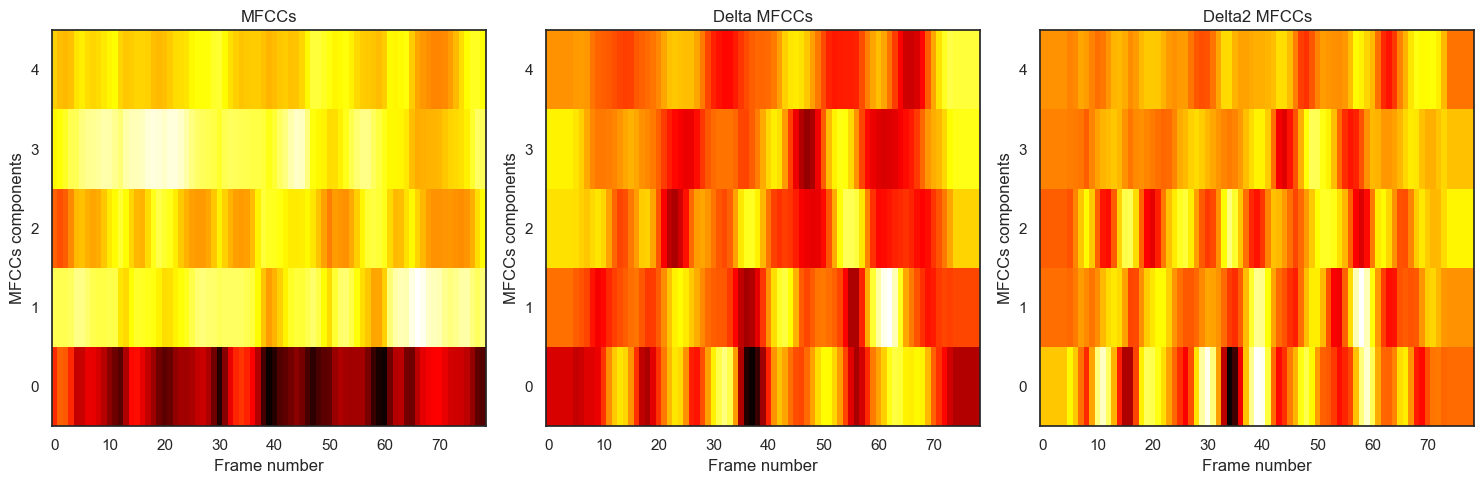

In [35]:
# here i just want to plot mfccs and its deltas

signal = df_development["trimmed_signal"][8888]
signal = signal[-40000:]
signal = np.pad(signal, (0, 40000-len(signal)), 'constant')
    
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=5, sr=22050)
    # Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
#comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.imshow(mfccs, origin='lower', aspect='auto', cmap='hot')
ax1.set_title("MFCCs")
ax1.set_xlabel("Frame number")
ax1.set_ylabel("MFCCs components")

ax2.imshow(delta_mfccs, origin='lower', aspect='auto', cmap='hot')
ax2.set_title("Delta MFCCs")
ax2.set_xlabel("Frame number")
ax2.set_ylabel("MFCCs components")

ax3.imshow(delta2_mfccs, origin='lower', aspect='auto', cmap='hot')
ax3.set_title("Delta2 MFCCs")
ax3.set_xlabel("Frame number")
ax3.set_ylabel("MFCCs components")

plt.tight_layout()
plt.show()


#### Data Augmentation

In [36]:
def extract_augmented_comprehensive_mfccs(row, technique):
    signal = row["trimmed_signal"]
    sr =22050
    
    # Add noise
    if technique == "add_noise":
        #noise = np.random.normal(0, 0.3, len(signal))
        #signal = signal + noise
        noise_factor = np.random.uniform(0.1, 0.3)
        noise = np.random.normal(0, signal.std(), signal.size)
        signal = signal + noise * noise_factor
    
    # Pith scaling 
    if technique == "pitch_scaling":
        num_semitones = np.random.randint(-5, 5)
        signal = librosa.effects.pitch_shift(signal, sr=sr, n_steps=num_semitones)
     
    # Apply random gain 
    if technique == "random_gain":
        gain_factor = np.random.uniform(2,4)
        signal = signal * gain_factor
        
    # Change volume
    if technique == "change_volume":
        volume_change = np.random.uniform(low=0.5, high=1.5)
        signal = signal * volume_change
    
  
    # Speed Augmentation
    if technique == "speed_augmentation":
        speed_factor = np.random.uniform(0.8, 1.4)
        signal = librosa.effects.time_stretch(signal, rate=speed_factor)

    # Harmonic distortion
    #harmonic_distortion = np.random.uniform(0, 0.3)
    #signal = signal + signal * harmonic_distortion
    
    signal = signal[-40000:]
    signal = np.pad(signal, (0, 40000-len(signal)), 'constant')
    
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=5, sr=sr)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

    return comprehensive_mfccs.reshape(-1)

augmentation_options = ["add_noise", 
                        "pitch_scaling", 
                        "random_gain", 
                        "change_volume", 
                        "speed_augmentation"]

In [37]:
aug_2 = [] 
for index, row in df_development[df_development["encoded_labels"]==2].iterrows():
    aug_2.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_2 = np.array(aug_2)
aug_2.shape

(552, 1185)

In [38]:
aug_1 = [] 
for index, row in df_development[df_development["encoded_labels"]==1].iterrows():
    aug_1.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_1 = np.array(aug_1)
aug_1.shape

(1113, 1185)

In [39]:
aug_0 = [] 
for index, row in df_development[df_development["encoded_labels"]==0].iterrows():
    aug_0.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_0 = np.array(aug_0)
aug_0.shape

(791, 1185)

In [40]:
aug_00 = [] 
for index, row in df_development[df_development["encoded_labels"]==0].iterrows():
    aug_00.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_00 = np.array(aug_00)
aug_00.shape

(791, 1185)

In [41]:
aug_22 = [] 
for index, row in df_development[df_development["encoded_labels"]==2].iterrows():
    aug_22.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_22 = np.array(aug_22)
aug_22.shape

(552, 1185)

In [42]:
aug_222 = [] 
for index, row in df_development[df_development["encoded_labels"]==2].iterrows():
    aug_222.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_222 = np.array(aug_222)
aug_222.shape

(552, 1185)

In [43]:
aug_3 = [] 
for index, row in df_development[df_development["encoded_labels"]==3].iterrows():
    aug_3.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_3 = np.array(aug_3)
aug_3.shape

(1189, 1185)

In [44]:
aug_5 = [] 
for index, row in df_development[df_development["encoded_labels"]==5].iterrows():
    aug_5.append(extract_augmented_comprehensive_mfccs(row, random.choice(augmentation_options)))
aug_5 = np.array(aug_5)
aug_5.shape

(1209, 1185)

In [45]:
augmented_features = np.concatenate((features, aug_2), axis=0)
augmented_features = np.concatenate((augmented_features, aug_1), axis=0)
augmented_features = np.concatenate((augmented_features, aug_0), axis=0)
augmented_features = np.concatenate((augmented_features, aug_00), axis=0)
augmented_features = np.concatenate((augmented_features, aug_22), axis=0)
augmented_features = np.concatenate((augmented_features, aug_222), axis=0)
augmented_features = np.concatenate((augmented_features, aug_3), axis=0)
augmented_features = np.concatenate((augmented_features, aug_5), axis=0)




augmented_features.shape                 

(16603, 1185)

In [46]:
encoded_labels = df_development["encoded_labels"]
new_entries = pd.Series([2]*552)
augmented_encoded_labels = pd.concat([encoded_labels,new_entries])
new_entries = pd.Series([1]*1113)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])
new_entries = pd.Series([0]*791)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])
new_entries = pd.Series([0]*791)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])
new_entries = pd.Series([2]*552)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])
new_entries = pd.Series([2]*552)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])
new_entries = pd.Series([3]*1189)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])
new_entries = pd.Series([5]*1209)
augmented_encoded_labels = pd.concat([augmented_encoded_labels,new_entries])

augmented_encoded_labels

0       1
1       0
2       2
3       6
4       6
       ..
1204    5
1205    5
1206    5
1207    5
1208    5
Length: 16603, dtype: int64

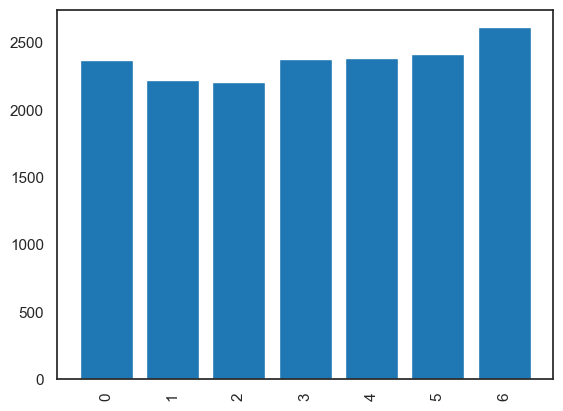

Counter({6: 2614, 5: 2418, 4: 2386, 3: 2378, 0: 2373, 1: 2226, 2: 2208})


In [47]:
check_class_balance(augmented_encoded_labels)

### MODELS

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(augmented_features)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, 
                                                    augmented_encoded_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)
y_predict_rf = rf_clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict_rf))
pd.crosstab(y_test,y_predict_rf)

0.8407106293285155


col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,433,6,0,10,3,3,3
1,12,419,9,6,7,9,10
2,5,3,424,3,10,1,14
3,5,15,7,358,10,38,12
4,10,5,7,10,363,4,78
5,14,2,6,57,6,383,13
6,6,9,8,12,68,13,412


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Perform the grid search with cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model using the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=6, n_estimators=30)

In [52]:
best_params

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 30}

In [53]:
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)
y_predict_best = best_model.predict(X_test)

In [54]:
print(accuracy_score(y_test,y_predict_best))
pd.crosstab(y_test,y_predict_best)

0.7892201144233665


col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,417,6,0,12,7,9,7
1,11,402,8,14,13,10,14
2,5,7,411,6,7,5,19
3,5,10,6,337,13,51,23
4,16,14,14,20,307,9,97
5,15,5,6,59,9,370,17
6,12,15,13,15,77,19,377


In [69]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)
y_predict_svm = svm_clf.predict(X_test)


In [70]:
print(accuracy_score(y_test,y_predict_svm))
pd.crosstab(y_test,y_predict_svm)

0.7997591087021981


col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,422,8,1,8,1,11,7
1,21,404,5,10,7,8,17
2,8,1,414,2,5,5,25
3,15,12,1,316,18,64,19
4,18,2,9,6,328,8,106
5,26,2,7,70,11,338,27
6,14,3,8,10,49,10,434


### Evaluation

In [56]:
df_evaluation = pd.read_csv('/Users/rostislavtimuta/Desktop/dsl_data/evaluation.csv')

In [57]:
df_evaluation['signal'] = df_evaluation.apply(load_signal, axis=1)

In [58]:
df_evaluation['trimmed_signal'] = df_evaluation.apply(trim_signal_and_reduce_noise, axis=1)

In [59]:
df_evaluation["features"] = df_evaluation.apply(extract_comprehensive_mfccs, axis=1)

In [60]:
df_evaluation

,Id,path,speakerId,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange,signal,trimmed_signal,features
0,0,dsl_data/audio/speakers/NgQEvO2x7Vh3xy2xz/f53c...,NgQEvO2x7Vh3xy2xz,native,English (United States),English (United States),male,22-40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006558113, -0.00063789036, -0.0006240465,...","[-437.03412, -348.793, -308.92166, -299.84167,..."
1,1,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/1d5f8...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.009902934, 0.0030181746, 0.026669284, 0.01...","[-353.71436, -318.65497, -324.62915, -339.3249..."
2,2,dsl_data/audio/speakers/7B4XmNppyrCK977p/1c0d5...,7B4XmNppyrCK977p,native,English (United States),English (United States),male,41-65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.010104064, -0.007082157, -0.0047967914, -0...","[-404.03845, -358.0093, -362.87973, -367.32703..."
3,3,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/275c3...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-4.0071667e-05, -3.2719843e-05, -2.5457064e-0...","[-535.40906, -414.8697, -308.40204, -258.7851,..."
4,4,dsl_data/audio/speakers/V4ZbwLm9G5irobWn/b7c7a...,V4ZbwLm9G5irobWn,native,English (United States),English (United States),female,41-65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00020468785, 0.00019510814, 0.00021195007, ...","[-573.0361, -451.91995, -334.9754, -290.92535,..."
...,...,...,...,...,...,...,...,...,...,...,...
1450,1450,dsl_data/audio/speakers/oOK5kxoW7dskMbaK/02f5d...,oOK5kxoW7dskMbaK,native,English (United States),English (United States),female,22-40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.12509015e-05, 1.2245645e-05, 0.00013605764...","[-516.1074, -443.15002, -399.75348, -351.88876..."
1451,1451,dsl_data/audio/speakers/oOK5kxoW7dskMbaK/87191...,oOK5kxoW7dskMbaK,native,English (United States),English (United States),female,22-40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.023699878, -0.013948671, -0.0073482785, -0...","[-351.63232, -259.9906, -262.04504, -295.47556..."
1452,1452,dsl_data/audio/speakers/ppymZZDb2Bf4NQnE/f2a9e...,ppymZZDb2Bf4NQnE,native,English (United States),English (United States),female,41-65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0005194957, 6.488885e-05, 0.0007504287, 0....","[-502.93106, -381.8461, -306.205, -278.5646, -..."
1453,1453,dsl_data/audio/speakers/aokxBz9LxXHzZzay/f347b...,aokxBz9LxXHzZzay,native,English (United States),English (United States),female,22-40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00025837575, -0.00029951523, -0.0003096290...","[-472.64044, -394.67752, -352.33188, -331.8436..."


In [63]:
eval_features = np.vstack(df_evaluation['features'].to_numpy())

In [64]:
eval_features.shape

(1455, 1185)

In [65]:
scaler_eval = StandardScaler()
scaled_eval_features = scaler_eval.fit_transform(eval_features)

In [71]:
predictions = encoder.inverse_transform(svm_clf.predict(scaled_eval_features))

In [72]:
import datetime
# Create a dataframe with the predictions
df_pred = pd.DataFrame({'Id': range(len(predictions)), 'Predicted': predictions})

current_date_and_time = datetime.datetime.now()
date_string = current_date_and_time.strftime("%m-%d %H_%M_%S")

name = "pred " + date_string +".csv"
# Save the dataframe to a CSV file
df_pred.to_csv(name, index=False)